In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter, defaultdict, OrderedDict
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_users_path = '../../Data/train_users_2.csv'

In [3]:
train_users = pd.read_csv(train_users_path)
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [21]:
devType = Counter(train_users.first_device_type).most_common()
devType

[('Mac Desktop', 89600),
 ('Windows Desktop', 72716),
 ('iPhone', 20759),
 ('iPad', 14339),
 ('Other/Unknown', 10667),
 ('Android Phone', 2803),
 ('Android Tablet', 1292),
 ('Desktop (Other)', 1199),
 ('SmartPhone (Other)', 76)]

## Percent of device users by chosen country of first visit

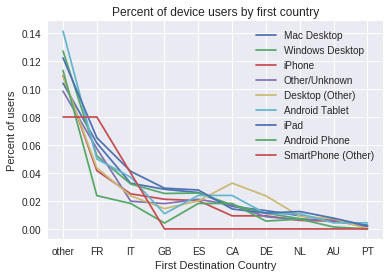

In [130]:
countryByDT = defaultdict(list)
countryByDTCount = defaultdict(list)
totByDT = defaultdict(list)
perByDT = defaultdict(list)
legend = []
countries = ['other','FR','IT','GB','ES','CA','DE','NL','AU','PT']
h = 1

for dev in train_users['first_device_type'].unique():
    countryByDT[dev] = train_users.country_destination[[j*r for j,r in zip(train_users.first_device_type == dev,train_users.country_destination != 'NDF')]]
    countryByDTCount[dev] = dict(Counter(countryByDT[dev]).items())
    totByDT[dev] = sum([countryByDTCount[dev][j]  for j in countryByDTCount[dev]])
    for i in countries:
        if i in countryByDTCount[dev]:
            perByDT[dev].append((i,countryByDTCount[dev][i]/totByDT[dev]))
        else:
            perByDT[dev].append((i,0))
    percent = [i[1] for i in perByDT[dev]] 
  
    #plt.bar(range(len(percent)),percent)
    #plt.xticks(range(len(countries)), countries) 
    #plt.title('Percent of ' + dev + ' users by first country')
    #plt.xlabel('First Destination Country')
    #plt.ylabel('Percent of ' + dev + ' users')
    #plt.show()
    if h == 1:
            plt.xticks(range(len(countries)), countries) 
            h = 0
    plt.title('Percent of device users by first country')
    plt.xlabel('First Destination Country')
    plt.ylabel('Percent of users')
    plt.plot(range(len(percent)),percent)
    legend.append(dev)
    
plt.legend(legend);
    
    
  

## Percent of device users by chosen country of first visit (w/o US)

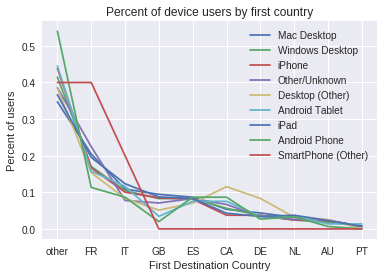

In [145]:
countryByDT = defaultdict(list)
countryByDTCount = defaultdict(list)
totByDT = defaultdict(list)
perByDT = defaultdict(list)
legend = []
percent = defaultdict(list)
countries = ['other','FR','IT','GB','ES','CA','DE','NL','AU','PT']
h = 1

for dev in train_users['first_device_type'].unique():
    countryByDT[dev] = train_users.country_destination[[j*r*z for j,r,z in zip(train_users.first_device_type == dev,train_users.country_destination != 'NDF',train_users.country_destination != 'US')]]
    countryByDTCount[dev] = dict(Counter(countryByDT[dev]).items())
    totByDT[dev] = sum([countryByDTCount[dev][j]  for j in countryByDTCount[dev]])
    for i in countries:
        if i in countryByDTCount[dev]:
            perByDT[dev].append((i,countryByDTCount[dev][i]/totByDT[dev]))
        else:
            perByDT[dev].append((i,0))
    percent[dev] = [i[1] for i in perByDT[dev]] 
  
    #plt.bar(range(len(percent)),percent)
    #plt.xticks(range(len(countries)), countries) 
    #plt.title('Percent of ' + dev + ' users by first country')
    #plt.xlabel('First Destination Country')
    #plt.ylabel('Percent of ' + dev + ' users')
    #plt.show()
    if h == 1:
            plt.xticks(range(len(countries)), countries) 
            h = 0
    plt.title('Percent of device users by first country')
    plt.xlabel('First Destination Country')
    plt.ylabel('Percent of users')
    plt.plot(range(len(percent[dev])),percent[dev])
    legend.append(dev)
    
plt.legend(legend);

    
    

## Average Destination Countries overall

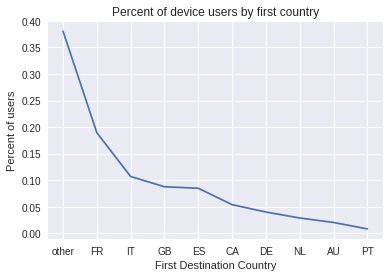

In [139]:
countryByDT = defaultdict(list)
countryByDTCount = defaultdict(list)
totByDT = defaultdict(list)
perByDT = []
legend = []
countries = ['other','FR','IT','GB','ES','CA','DE','NL','AU','PT']
h = 1

countryByDT = train_users.country_destination[[j*r for j,r in zip(train_users.country_destination != 'NDF',train_users.country_destination != 'US')]]
countryByDTCount = dict(Counter(countryByDT).items())
totByDT = sum([countryByDTCount[j]  for j in countryByDTCount])
for i in countries:
    if i in countryByDTCount:
        perByDT.append((i,countryByDTCount[i]/totByDT))
    else:
        perByDT.append((i,0))
percentAll = [i[1] for i in perByDT] 

#plt.bar(range(len(percent)),percent)
#plt.xticks(range(len(countries)), countries) 
#plt.title('Percent of ' + dev + ' users by first country')
#plt.xlabel('First Destination Country')
#plt.ylabel('Percent of ' + dev + ' users')
#plt.show()

plt.xticks(range(len(countries)), countries) 
plt.title('Percent of device users by first country')
plt.xlabel('First Destination Country')
plt.ylabel('Percent of users')
plt.plot(range(len(percentAll)),percentAll)
    
plt.legend(legend);

    
    

## Device Differences

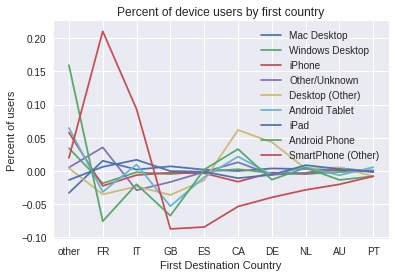

In [148]:
h = 1
for dev in train_users['first_device_type'].unique():
    if h == 1:
            plt.xticks(range(len(countries)), countries) 
            h = 0
    plt.title('Percent of device users by first country')
    plt.xlabel('First Destination Country')
    plt.ylabel('Percent of users')
    plt.plot(range(len(percent[dev])),np.subtract(percent[dev],percentAll))
    legend.append(dev)
    
plt.legend(legend);